# Metody Obliczeniowe w Nauce i Technice
# Laboratorium 1: Arytmetyka komputerowa
## Przemysław Roman

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import time

def time_exec(func, *args):
    start_time = time.time()
    result = func(*args)
    return result, time.time() - start_time

## Zadanie 1 Sumowanie liczb pojedynczej precyzji

1. Napisz program, który oblicza sumę N liczb pojedynczej precyzji przechowywanych
w tablicy o N = 10^7 elementach. Tablica wypełniona jest tą samą wartością v z
przedziału [0.1, 0.9] np. v = 0.53125.

In [21]:
N = 10**7
v = np.float32(0.53125)
arr = np.array([v]*N)

v, type(v)

(0.53125, numpy.float32)

In [22]:
def sum_naively(arr):
    _sum = np.float32(0)
    for i in range(N):
        _sum += arr[i]
    return _sum

naive_sum, naive_sum_time = time_exec(sum_naively, arr)
naive_sum

5030840.5

2. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny jest tak
duży?

In [23]:
def get_absolute_error(expected_val, val):
    return abs(expected_val - val)

def get_relative_error(expected_val, val):
    return get_absolute_error(expected_val, val) / expected_val

def print_errors(expected_val, val):
    print(f'błąd bezwzględny: {get_absolute_error(expected_val, val)}')
    print(f'błąd względny: {get_relative_error(expected_val, val)}')

expected_sum = N * v
print_errors(expected_sum, naive_sum)

błąd bezwzględny: 281659.5
błąd względny: 0.05301825882352941


Błąd względny jest duży ponieważ od pewnego momentu zmienna przechowująca sumę jest znacznie większa od wartości dodawanych.
Powoduje to utratę mniej znaczących bitów wartości dodawanej.
Dodatkowo wykonujemy takie sumowanie wielokrotnie więc błąd się kumuluje.

3. W jaki sposób rośnie błąd względny w trakcie sumowania? Przedstaw wykres (ra-
portuj wartość błędu co 25000 kroków) i dokonaj jego interpretacji.

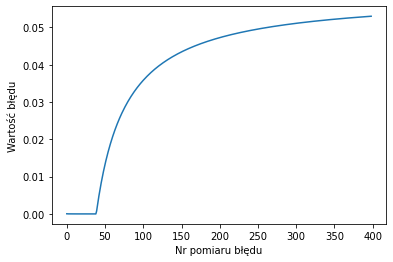

In [24]:
relative_errors = []
naive_sum = np.float32(0)
for i in range(N):
    naive_sum += v
    if i % 25000 == 0 and i != 0:
        ratio = np.float32(i / N)
        expected_val = np.float32(expected_sum * ratio)
        relative_errors.append(get_relative_error(expected_val, naive_sum))

plt.plot(relative_errors)
plt.xlabel('Nr pomiaru błędu')
plt.ylabel('Wartość błędu')
plt.show()

Krzywa błędu przypomina wykres logarytmiczny, można ją podzielić na 2 przedziały (granice są szacowane):
$$ x \in [0, 40] $$
Wartość błędu jest znikoma, ponieważ suma dla tylu elementów nie jest dostatecznie większa od wartości dodawanych.

$$ x \in [40, 400] $$
Wartość błędu rośnie, ponieważ suma jest dostatecznie duża, żeby występowała utrata mniej znaczących bitów wartości dodawanej.
Wzrost błędu jest na początku gwałtowny i maleje wraz ze wzrostem x (tracona część wartości dodawanej maleje, suma rośnie).

4. Zaimplementuj rekurencyjny algorytm sumowania, działający jak na rysunku poniżej.
![Rekurencyjny algorytm sumowania](sumowanie_rekurencyjne.png)

In [25]:
def sum_recursively(arr):
    n = len(arr)
    if n == 0:
        return np.float32(0)
    elif n == 1:
        return arr[0]
    elif n == 2:
        return arr[0] + arr[1]
    else:
        return sum_recursively(arr[:n//2]) + sum_recursively(arr[n//2:])

recursive_sum, recursive_sum_time = time_exec(sum_recursively, arr)
recursive_sum

5312500.0

6. Wyznacz bezwzględny i względny błąd obliczeń. Dlaczego błąd względny znacznie
zmalał?

In [26]:
print_errors(expected_sum, recursive_sum)

błąd bezwzględny: 0.0
błąd względny: 0.0


Błąd zmalał ponieważ na każdym etapie sumujemy liczby tego samego rzędu wielkości.

6. Porównaj czas działania obu algorytmów dla tych samych danych wejściowych.

In [27]:
print(f'podejście naiwne: {naive_sum_time}s')
print(f'podejście rekurencyjne: {recursive_sum_time}s')

podejście naiwne: 1.2832098007202148s
podejście rekurencyjne: 5.862637042999268s


Podejście rekurencyjne wykonuje się dłużej (~*4) w porównaniu do podejścia naiwnego.
Przy wywoływaniu funkcji rekurencyjnie należy najpierw zejść wgłąb drzewa wywołań a następnie wrócić, dlatego podejście to wykonuje się dłużej.
Warto również zwrócić uwagę na fakt, że dla większych tablic nie uzyskamy wyniku,
ponieważ osiągniemy maksymalną głębokość zagnieżdżenia rekurencji zanim go obliczymy.

7. Przedstaw przykładowe dane wejściowe, dla których algorytm sumowania rekuren-
cyjnego zwraca niezerowy błąd.

In [39]:
_N = 10**7
_v = np.float32(0.37296)
_arr = [_v] * _N
_expected_sum = _N * _v
_recursive_sum, _recursive_sum_time = time_exec(sum_recursively, _arr)

In [40]:
print_errors(_expected_sum, _recursive_sum)

błąd bezwzględny: 0.2623023986816406
błąd względny: 7.03299007444268e-08


## Zadanie 2 Algorytm Kahana

0. Zaimplementuj algorytm sumowania Kahana.

In [30]:
def sum_kahan(arr):
    N = len(arr)
    _sum = np.float32(0)
    err = np.float32(0)

    for i in range(N):
        y = arr[i] - err
        temp = _sum + y
        err = (temp - _sum) - y
        _sum = temp

    return _sum

1. Wyznacz bezwzględny i względny błąd obliczeń dla tych samych danych wejścio-
wych jak w przypadku testów z Zadania 1.

In [31]:
kahan_sum, kahan_sum_time = time_exec(sum_kahan, arr)
print_errors(expected_sum, kahan_sum)

błąd bezwzględny: 0.0
błąd względny: 0.0


2. Wyjaśnij dlaczego w algorytm Kahana ma znacznie lepsze własności numeryczne?
Do czego służy zmienna err?

Algorytm Kahana wprowadza zmienną err w celu szacowania błędu spowodowanego przez utratę mniej znaczących bitów wartości dodawanej.
```python
y = arr[i] - err # uwzględniamy utracone niskie bity z poprzedniej iteracji (-(-(niższe bity y)))
temp = _sum + y
err = (temp - _sum) - y # (temp - _sum) odzyskuje wyższe bity y,
# po odjęciu od tej wartości y otrzymujemy -(niższe bity y)
_sum = temp
```

3. Porównaj czasy działania algorytmu Kahana oraz algorytmu sumowania rekuren-
cyjnego dla tych samych danych wejściowych.

In [32]:
print(f'podejście Kahana: {kahan_sum_time}s')
print(f'podejście rekurencyjne: {recursive_sum_time}s')

podejście Kahana: 2.8385918140411377s
podejście rekurencyjne: 5.862637042999268s


Na maszynie, na której przygotowywałem ten dokument podejście Kahana wykonywało się szybciej od podejścia rekurencyjnego.
Nie jest to jednak zasadą, średnio powinny się wykonywać w przybliżonym czasie.

Przewagą algorytmu Kahana nad podejściem rekurencyjnym jest:
 - brak problemu z limitem na zagnieżdżenie rekurencji,
 - nie wymaga dodatkowej pamięci na wykonywanie rekurencji.

## Zadanie 3 Sumy częściowe

Rozważ sumy częściowe szeregu definiującego funkcję dzeta Riemanna
$$ \zeta(s) = \sum_{k=1}^{n} \frac{1}{k^{s}} $$
oraz funkcję eta Dirichleta
$$ \eta(s) = \sum_{k=1}^{n} (-1)^{k-1} \frac{1}{k^{s}} $$

Dla s = 2, 3.6667, 5, 7.2, 10 oraz n = 50, 100, 200, 500, 1000 oblicz wartości funkcji ζ(s)
i η(s) w pojedynczej precyzji sumując w przód, a następnie wstecz. Porównaj wyniki
z rezultatami uzyskanymi dla podwójnej precyzji. Dokonaj interpretacji otrzymanych
wyników.

In [33]:
def dzeta_riemann_step(k, s, dtype):
    return dtype(1 / dtype(k**s))

def eta_dirichlet_step(k, s, dtype):
    return dtype(dtype((-1)**(k-1)) * dtype(1 / dtype(k**s)))

def adder(s, n, dtype, step_func, forward=True):
    _sum = dtype(0)
    _range = range(1, n+1) if forward else range(n, 0, -1)
    for k in _range:
        _sum += step_func(k, s, dtype)
    return _sum

def main(s_vals, n_vals, step_func):
    for s in s_vals:
        for n in n_vals:
            print(f's: {s}, n: {n}')
            float32_forward = adder(s, n, np.float32, step_func)
            float32_backward = adder(s, n, np.float32, step_func, False)
            float64_forward = adder(s, n, np.float64, step_func)
            float64_backward = adder(s, n, np.float64, step_func, False)

            print(f'\tfloat32 forward: {float32_forward}')
            print(f'\tfloat32 backward: {float32_backward}')
            print(f'\tfloat64 forward: {float64_forward}')
            print(f'\tfloat64 backward: {float64_backward}')
            print()

            print(f'\tfloat32 vs float64: {float32_forward - float64_forward}, {float32_backward - float64_backward}')
            print(f'\tforward vs backward: {float32_forward - float32_backward}, {float64_forward - float64_backward}')
            print()

s_vals = [2, 3.6667, 5, 7.2, 10]
n_vals = [50, 100, 200, 500, 1000]
print('dzeta Riemann ======================================================================================')
main(s_vals, n_vals, dzeta_riemann_step)
print('eta Dirichlet ======================================================================================')
main(s_vals, n_vals, eta_dirichlet_step)

dzeta Riemann ======================================================================================
s: 2, n: 50
	float32 forward: 1.6251329183578491
	float32 backward: 1.62513267993927
	float64 forward: 1.625132733621529
	float64 backward: 1.6251327336215293

	float32 vs float64: 1.8473632001914098e-07, -5.368225930446613e-08
	forward vs backward: 2.384185791015625e-07, -2.220446049250313e-16

s: 2, n: 100
	float32 forward: 1.634984016418457
	float32 backward: 1.6349838972091675
	float64 forward: 1.6349839001848923
	float64 backward: 1.634983900184893

	float32 vs float64: 1.1623356477308278e-07, -2.975725443832289e-09
	forward vs backward: 1.1920928955078125e-07, -6.661338147750939e-16

s: 2, n: 200
	float32 forward: 1.639946699142456
	float32 backward: 1.639946460723877
	float64 forward: 1.6399465460149971
	float64 backward: 1.6399465460149973

	float32 vs float64: 1.5312745893503177e-07, -8.529112038857534e-08
	forward vs backward: 2.384185791015625e-07, -2.220446049250313e-16

s: 

Obserwacje:
- float32 zachowuje precyzje do 6-8 miejsca po przecinku;
- float64 zachowuje precyzję do 15-16 miejsca po przecinku;
- Dla s > 1 (co rozpatrujemy) oraz k ∈ N+ szereg definiujący funkcję dzeta Riemanna jest malejący.
    Zaczynając od pierwszego wyrazu suma byłaby niepotrzebnie duża od początku. Możemy sumować od ostatniego
    wyrazu, wtedy nie utracimy mniej znaczących bitów najmniejszych wyrazów szeregu;
- Szereg definiujący funkcję eta Dirichleta jest naprzemienny, wyrazy szeregu są na moduł malejące.
    Kierując się argumentacją z punktu powyższego sumowanie od tyłu może być efektywniejsze.
    Możliwe, że lepsze wyniki dałoby sumowanie parami dwóch kolejnych wyrazów, (ze względu na naprzemienność szeregu),
    dodając do zmiennej przechowującej sumę wynik tego dodawania. Otrzymywalibyśmy wtedy mniejsze wyrazy do
    sumowania.

## Zadanie 4 Błędy zaokrągleń i odwzorowanie logistyczne (dodatkowe)

Rozważ odwzorowanie logistyczne dane następującym wzorem rekurencyjnym
$$ x_{n+1} = rx_{n} (1 − x_{n}) $$
Przy czym
$$ 0 <= x_{n} <= 1 $$
$$ r > 0 $$
Zbadaj zbieżność procesu iteracyjnego określonego tym
równaniem w zależności od wartości parametru r oraz x<sub>0</sub>.

In [34]:
def logistic_map(r, x_n, dtype):
    return r * x_n * dtype(1 - x_n)

a) Dla różnych wartości r (1 <= r <= 4) oraz kilku wybranych wartości x<sub>0</sub> przedstaw
na wykresie wartości x<sub>n</sub> uzyskane po wielu iteracjach odwzorowania logistycznego
(diagram bifurkacyjny). Dokonaj interpretacji otrzymanych wyników.

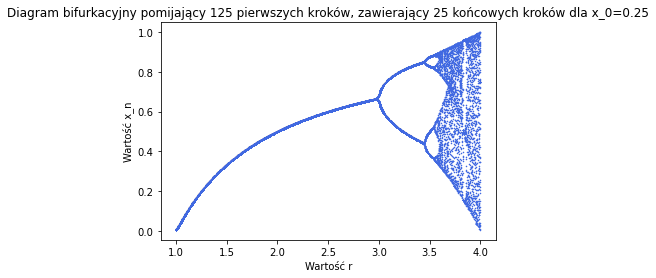

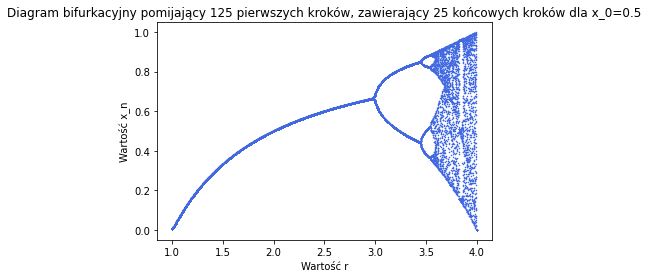

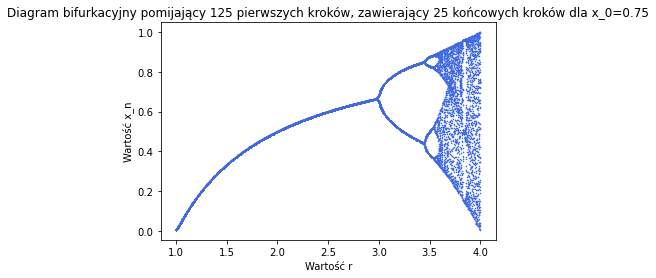

In [35]:
def bifurcation_diagram(rs, x_0, n_skip, n_plot, dtype):
    R = [0] * n_plot
    X = [0] * n_plot
    for r in rs:
        x = x_0
        for i in range(n_skip+n_plot):
            if i >= n_skip:
                R[i-n_skip] = r
                X[i-n_skip] = x
            x = logistic_map(r, x, dtype)
        plt.plot(R, X, marker='*', markersize=1, ls='', color='royalblue')

    plt.xlabel('Wartość r')
    plt.ylabel('Wartość x_n')
    plt.title(f'Diagram bifurkacyjny pomijający {n_skip} pierwszych kroków, zawierający {n_plot} końcowych kroków dla x_0={x_0}')
    plt.show()

rs = np.linspace(1, 4, 10**3, dtype=np.float32)
x_0s = np.linspace(0, 1, 5, dtype=np.float32)[1:-1] # [1:-1] ponieważ x_0 ∈ (0, 1), odrzucamy oba końce

for x_0 in x_0s:
    bifurcation_diagram(rs, x_0, 125, 25, np.float32)

Obserwacje:
- Diagramy wyglądają bardzo podobnie pomimo różnych wartości wyrazów początkowych x<sub>0</sub>;
- Dla r ∈ [1, 3) diagram przypomina krzywą logarytmiczną;
- Dla r ∈ [3, 3.5) diagram przypomina wykres y^2 = x;
- Dla r ∈ [3, 4] rozpiętość diagramu na osi pionowej zwiększa się wraz z rosnącym r.

b) Dla tych samych wartości x<sub>0</sub> oraz r ∈ (3.75 <= r <= 3.8) porównaj trajektorie obliczone
z użyciem pojedynczej i podwójnej precyzji. Wyjaśnij otrzymane wyniki.

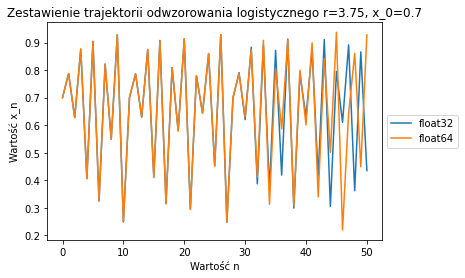

Maksymalna bezwzględna różnica wartości: 0.49889710556652067


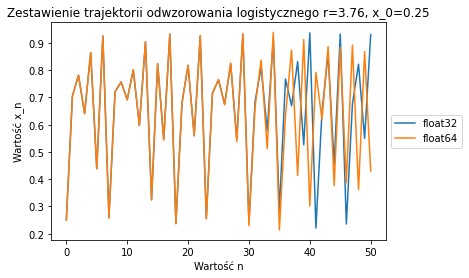

Maksymalna bezwzględna różnica wartości: 0.6355710039416663


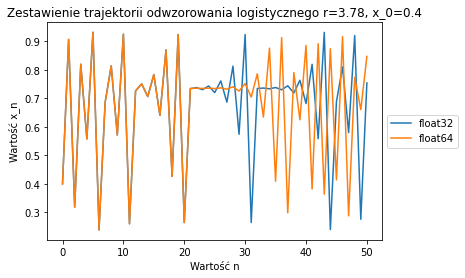

Maksymalna bezwzględna różnica wartości: 0.635327444962589


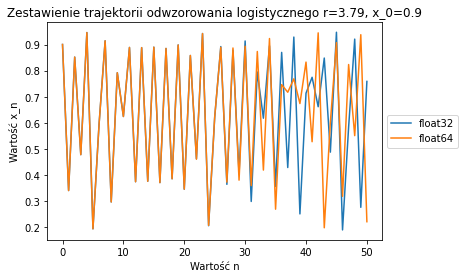

Maksymalna bezwzględna różnica wartości: 0.6607726226233249


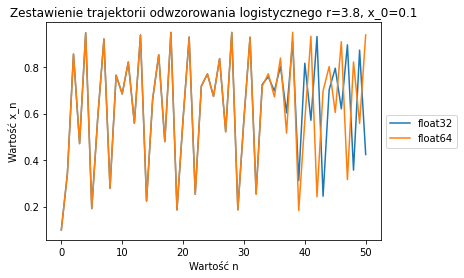

Maksymalna bezwzględna różnica wartości: 0.6885182581158772


In [36]:
def trajectories_graph(r, x_0, n):
    x_float32 = np.float32(x_0); x_float64 = np.float64(x_0)
    x_ns_float32 = [x_float32]; x_ns_float64 = [x_float64]
    max_abs_diff = get_absolute_error(x_float32, x_float64)

    for i in range(n):
        x_float32 = logistic_map(r, x_float32, np.float32)
        x_float64 = logistic_map(r, x_float64, np.float64)
        x_ns_float32.append(x_float32)
        x_ns_float64.append(x_float64)
        max_abs_diff = max(max_abs_diff, get_absolute_error(x_float32, x_float64))

    plt.plot(x_ns_float32, label='float32')
    plt.plot(x_ns_float64, label='float64')
    plt.xlabel('Wartość n')
    plt.ylabel('Wartość x_n')
    plt.title(f'Zestawienie trajektorii odwzorowania logistycznego r={r}, x_0={x_0}')
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

    print(f'Maksymalna bezwzględna różnica wartości: {max_abs_diff}')

n = 50
trajectories_graph(3.75, 0.7, n)
trajectories_graph(3.76, 0.25, n)
trajectories_graph(3.78, 0.4, n)
trajectories_graph(3.79, 0.9, n)
trajectories_graph(3.80, 0.1, n)

Obserwacje:
- Dla małych n (< 25) wartości zmiennych pojedynczej i podwójnej precyzji są takie same;
- Dla większych n (>= 25) różnią się nawet o 0.68 (co jest znaczną różnicą, ponieważ 0 <= x<sub>n</sub> <= 1).
    Spowodowane jest to tym, że występujące błędy nakładały się przez poprzednie iteracje oraz tym, że odwzorowanie logistyczne
    jest czułe na różnice w podanych argumentach tzn. mała zmiana na wejściu daje dużą zmianę na wyjściu.

c) Dla r = 4 i różnych wartości x 0 wyznacz (pojedyncza precyzja) liczbę iteracji
potrzebnych do osiągnięcia zera. Przedstaw interpretację rezultatów.

#### Kod może się długo wykonywać (~30s)

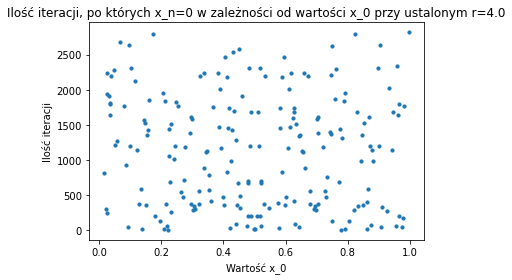

Wartości początkowych, dla których odwzorowanie nie zbiegło do 0: 793


In [37]:
def find_iterations_to_zero(r, x_0, stop_after_cnt=10**4):
    x = x_0
    i = 0

    while x > np.finfo(np.float32).eps and i <= stop_after_cnt:
        x = logistic_map(r, x, np.float32)
        i += 1

    return i if i < stop_after_cnt else -1

start = time.time()
r = np.float32(4)
x_0s = np.linspace(0, 1, 10**3, dtype=np.float32)[1:-1] # [1:-1] ponieważ x_0 ∈ (0, 1), odrzucamy oba końce
X = []
I = []

for x_0 in x_0s:
    i = find_iterations_to_zero(r, x_0)
    if i != -1:
        X.append(x_0)
        I.append(i)

plt.scatter(X, I, s=10)
plt.xlabel('Wartość x_0')
plt.ylabel('Ilość iteracji')
plt.title(f'Ilość iteracji, po których x_n=0 w zależności od wartości x_0 przy ustalonym r={r}')
plt.show()

print(f'Wartości początkowych, dla których odwzorowanie nie zbiegło do 0: {len(x_0s)-len(I)}')

Obserwacje:
- Chmura punktów jest rozproszona;
- Stosunkowo duża liczba (793 na 1000) wartości początkowych, dla których odwzorowanie nie zbiegło do 0;
- Początkowo zaimplementowałem rozwiązanie dla podwójnej precyzji.
    Wynik uzyskałem wtedy znacznie szybciej oraz wszystkie wartości początkowe dawały zbieżność do 0.
    Różnica w szybkości wykonania spowodowana jest bardziej złożonym sposobem tworzenia zmiennej pojedynczej precyzji przez bibliotekę numpy, z której korzystam.
    Drugim powodem są x<sub>0</sub>, dla których nie uzyskujemy zbieżności (większa liczba iteracji aż do osiagnięcia limitu przeciwdziałającemu blokadzie).

Proces tworzenia float32 oraz float64 w bibliotece numpy [(źródło)](https://stackoverflow.com/a/6053175)
![Proces tworzenia float32 oraz float64 w bibliotece numpy](proces_tworzenia_float32_float64.png)

d) Przebiegi odwzorowań logistycznych o różnych parametrach początkowych.
(Polecenie nie wystąpiło, byłem ciekaw jak się zachowuje dla różnych parametrów początkowych)

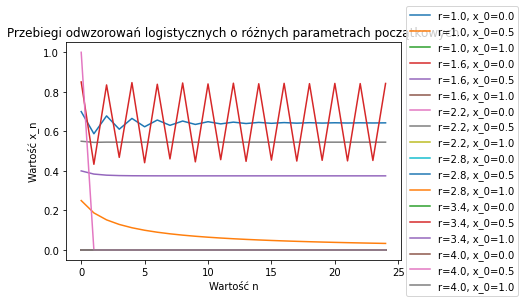

In [38]:
rs = np.linspace(1, 4, 6)
x_0s = np.linspace(0, 1, 3)
n = 25
to_plot = [0] * n

for r in rs:
    for x_0 in x_0s:
        x = to_plot[0] = x_0
        for i in range(n):
            x = to_plot[i] = logistic_map(r, x, np.float32)
        plt.plot(to_plot, label=f'r={r}, x_0={x_0}')

plt.xlabel('Wartość n')
plt.ylabel('Wartość x_n')
plt.title('Przebiegi odwzorowań logistycznych o różnych parametrach początkowych')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()